# Cobweb graph as sensitivity tool

The Cobweb graph enables to visualize all the combinations of the input
variables which lead to a specific range of the output variable.

Let's suppose a model $f: \mathbb{R}^n \longrightarrow \mathbb{R}$, where $f(\underline{X}) = Y$.

The graph requires to have an input sample $X_s$ and an output sample $Y_s$.

The first figure draws such a graph: each column represents one component
$X_i$ of the input vector $\underline{X}$.
The last column represents the scalar output variable $Y$.
For each point $\underline{X}^j$, each component $X_i^j$
is noted on its respective axe and the last mark is the one which corresponds to
the associated $Y^j$. A line joins all the marks. Thus, each point of the sample
corresponds to a particular line on the graph.

The scale of the axes are quantile based: each axe runs between 0 and 1 and each
value is represented by its quantile with respect to its marginal empirical distribution.

It is interesting to select, among those lines, the ones which correspond to a specific range of the output variable.
These particular lines are colored differently.
This specific range is defined in the quantile based scale of $Y$ or in its specific scale.
In that second case, the range is automatically converted into a quantile based scale range.

In [9]:
from __future__ import print_function
import openturns as ot

In [29]:
# Create data to visualize

# Create the model Y = x1^2 + x2
model = ot.SymbolicFunction(["x1", "x2"], ["x1^2+x2"])

# Create the input distribution and random vector X
myCorMat = ot.CorrelationMatrix(2)
myCorMat[0, 1] = -0.6
inputDist = ot.Normal([0., 0.], myCorMat)
inputDist.setDescription(['X1', 'X2'])

inputVector = ot.RandomVector(inputDist)

# Create the output random vector Y=model(X)
output = ot.CompositeRandomVector(model, inputVector)

# Generate the input sample
N = 500
X = inputVector.getSample(N)

# Evaluate the associated output sample
Y = model(X)
Y.setDescription("Y")

print(Y.getMin(), Y.getMax(), Y.computeQuantilePerComponent(0.9))

[-2.07905] [8.7458] [3.34906]


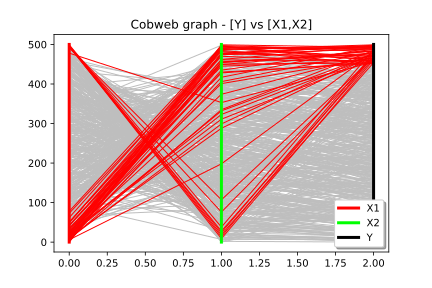

In [32]:
# Example 1: value based scale to describe the Y range
minValue = 3.35
maxValue = 20.0
quantileScale = False
graphCobweb = ot.VisualTest.DrawCobWeb(X, Y, minValue, maxValue, 'red', quantileScale)
graphCobweb.setLegendPosition('bottomright')
graphCobweb

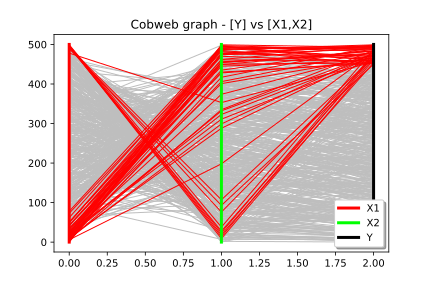

In [31]:
# Example 2: rank based scale to describe the Y range
minValue = 0.9
maxValue = 1.0
quantileScale = True
graphCobweb = ot.VisualTest.DrawCobWeb(X, Y, minValue, maxValue, 'red', quantileScale)
graphCobweb.setLegendPosition('bottomright')
graphCobweb